* Nome: Christian Silva de Freitas

In [ ]:
import pandas as pd
import numpy as np
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import animation, colors
import seaborn as sns

Dataset disponivel em: https://www.kaggle.com/datasets/jacksonharper/data_banknote_authentication

In [ ]:
data_file = "data_banknote_authentication.txt"
data_x = np.loadtxt(data_file, delimiter=",", skiprows=0, usecols=range(0,4) ,dtype=np.float64)
data_y = np.loadtxt(data_file, delimiter=",", skiprows=0, usecols=(4,),dtype=np.int64)

In [ ]:
df = pd.DataFrame(data_x)
df.columns = ['variance_of_Wavelet_Transformed_image', 'skewness of Wavelet Transformed image',
             'curtosis of Wavelet Transformed image', 'entropy of image']
df.head()

,variance_of_Wavelet_Transformed_image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [ ]:
df['class'] = data_y
df.head()

,variance_of_Wavelet_Transformed_image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

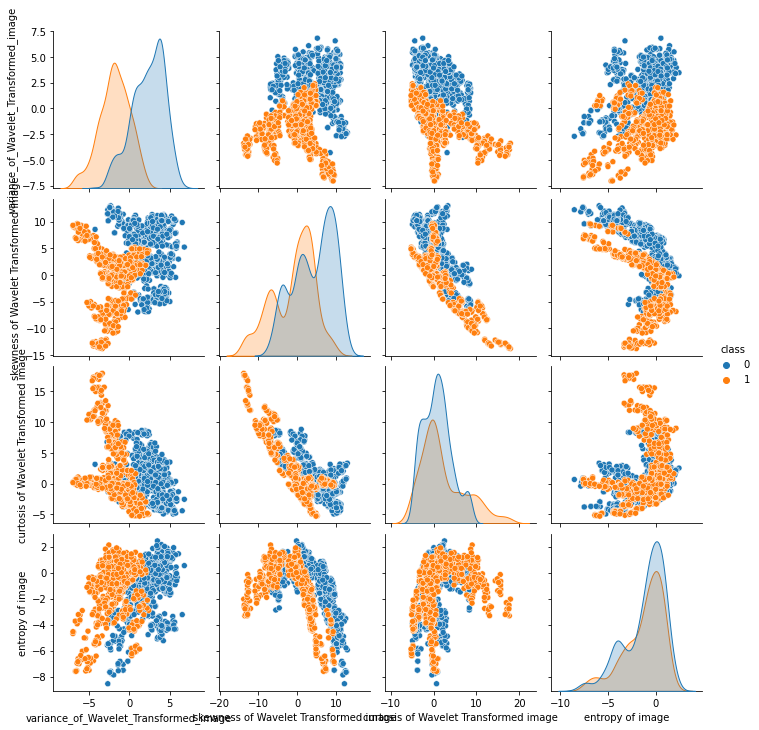

In [ ]:
sns.pairplot(df, hue='class')

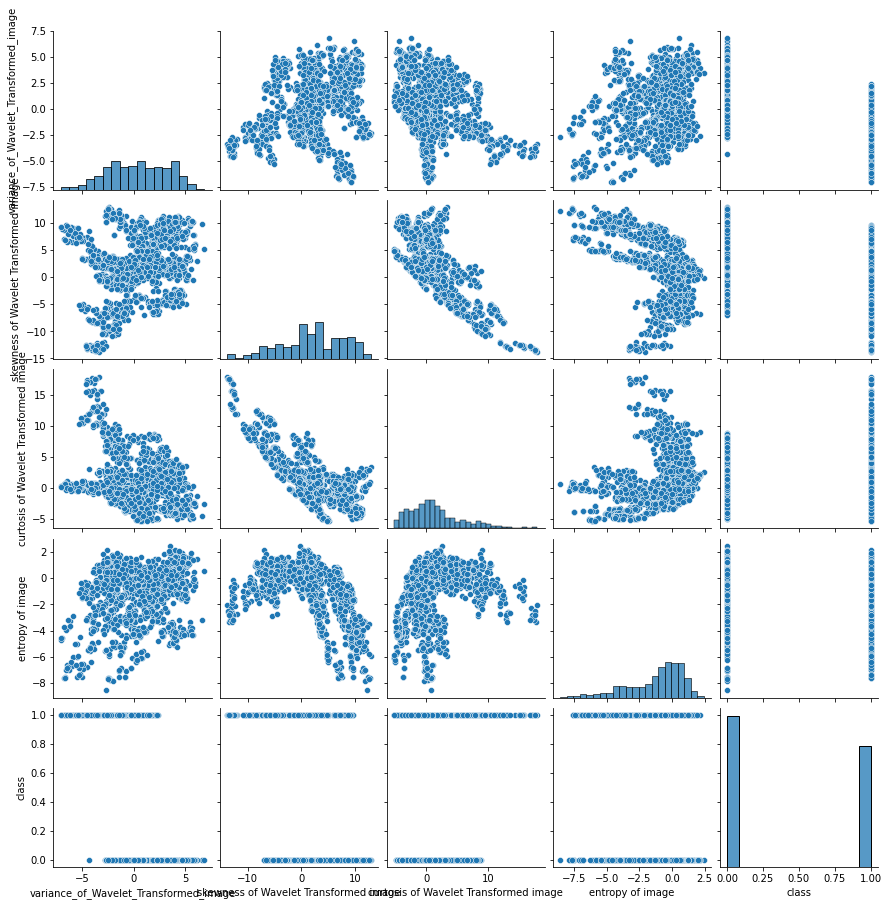

In [ ]:
sns.pairplot(df)

In [ ]:
df.shape

(1372, 5)

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df.drop(columns=['class']))
x_scaled

array([[0.76900389, 0.83964273, 0.10678269, 0.73662766],
       [0.83565902, 0.82098209, 0.12180412, 0.64432563],
       [0.78662859, 0.41664827, 0.31060805, 0.78695091],
       ...,
       [0.23738543, 0.01176814, 0.98560321, 0.52475518],
       [0.25084193, 0.20170105, 0.76158701, 0.6606745 ],
       [0.32452819, 0.49074676, 0.34334762, 0.88594888]])

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x_scaled, data_y, test_size=0.3, random_state=21)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(960, 4) (960,) (412, 4) (412,)


In [ ]:
!pip install minisom
from minisom import MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
som_shape = (1, 2)
som = MiniSom(som_shape[0], som_shape[1], train_x.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(train_x, 500, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.3004401360427086


In [ ]:
winner_coordinates = np.array([som.winner(x) for x in train_x]).T
print(winner_coordinates)

[[0 0 0 ... 0 0 0]
 [1 1 1 ... 0 1 0]]


In [ ]:
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
print(cluster_index)

[1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0
 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0
 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0
 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0
 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1
 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1
 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1
 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0
 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0
 0 0 1 1 0 1 0 0 1 1 0 0 

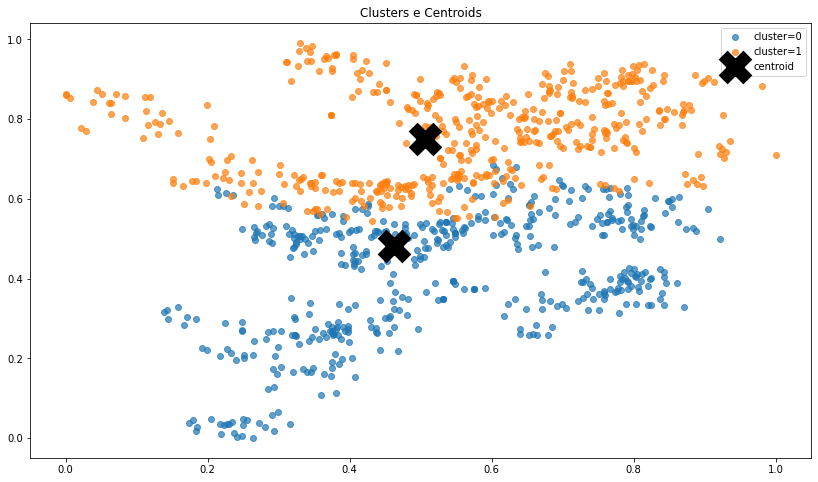

In [ ]:
plt.figure(figsize=(14,8))
plt.title('Clusters e Centroids')
for c in np.unique(cluster_index):
    plt.scatter(train_x[cluster_index == c, 0],
                train_x[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids

for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x',
                s=80, linewidths=35, color='k', label='centroid')
plt.legend();

In [ ]:
new_scaled = scaler.fit_transform(df.drop(columns=['class']))
new_scaled

array([[0.76900389, 0.83964273, 0.10678269, 0.73662766],
       [0.83565902, 0.82098209, 0.12180412, 0.64432563],
       [0.78662859, 0.41664827, 0.31060805, 0.78695091],
       ...,
       [0.23738543, 0.01176814, 0.98560321, 0.52475518],
       [0.25084193, 0.20170105, 0.76158701, 0.6606745 ],
       [0.32452819, 0.49074676, 0.34334762, 0.88594888]])

In [ ]:
som.win_map(new_scaled)

defaultdict(list,
            {(0, 1): [array([0.76900389, 0.83964273, 0.10678269, 0.73662766]),
              array([0.83565902, 0.82098209, 0.12180412, 0.64432563]),
              array([0.75710505, 0.87169921, 0.05492063, 0.45043964]),
              array([0.82285875, 0.87727458, 0.05710039, 0.48971149]),
              array([0.73883132, 0.73085573, 0.19525922, 0.72157724]),
              array([0.61857373, 0.85876736, 0.12985116, 0.71040763]),
              array([0.59615343, 0.84382612, 0.13236263, 0.70394082]),
              array([0.64480165, 0.80208945, 0.23434812, 0.49441247]),
              array([0.39412558, 0.92109921, 0.3374028 , 0.51028851]),
              array([0.75331184, 0.84188784, 0.09884765, 0.72522255]),
              array([0.88587932, 0.92799171, 0.04019644, 0.40434818]),
              array([0.92513828, 0.81060966, 0.1148685 , 0.73298235]),
              array([0.79169101, 0.89562465, 0.06300644, 0.41199524]),
              array([0.57532253, 0.84785236, 0.1552

In [ ]:
som.distance_map().shape[0]

1